# Proyek Analisis Data: Bike Sharing
- **Nama:** Nazwa Akilla Zahra
- **Email:** nazwaakillazh@gmail.com
- **ID Dicoding:** MC009D5X0578

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?
- Pertanyaan 2: Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah pengguna sepeda?
- Pertanyaan 3: Bagaimana segmentasi pengguna berdasarkan pola peminjaman mereka?

## Import Semua Packages/Library yang Digunakan

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Set style visualisasi
sns.set(style='whitegrid', palette='pastel')

## Data Wrangling

### Gathering Data

In [258]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [259]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data harian jumlah pengguna sepeda.

- Dataset hour.csv berisi data jumlah pengguna sepeda berdasarkan jam.

### Assessing Data

In [ ]:
print("Info dataset day:")
print(day_df.info())


Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
print("Info dataset hour:")
print(hour_df.info())


Info Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Missing value (Data kosong)

In [262]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [263]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


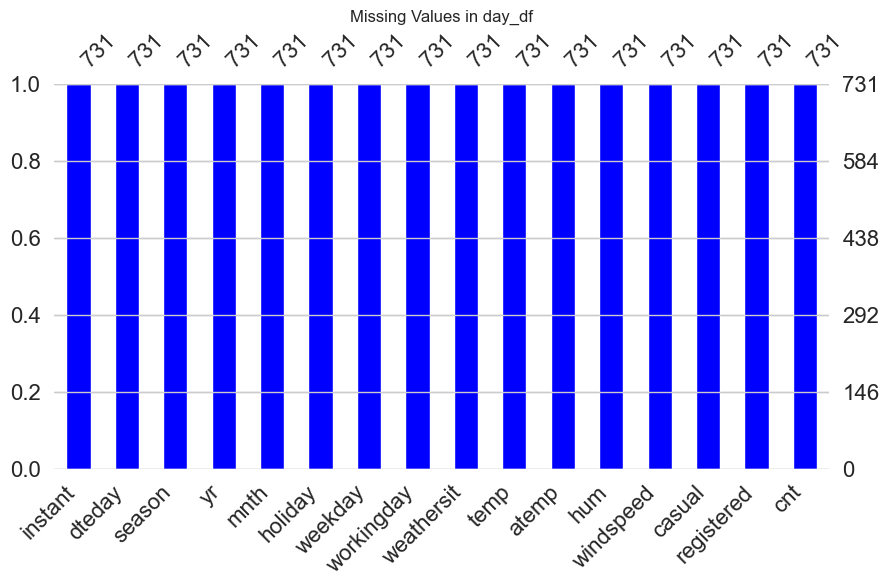

In [ ]:
msno.bar(day_df, color='blue', figsize=(10,5))
plt.title("Missing values in day_df")
plt.show()

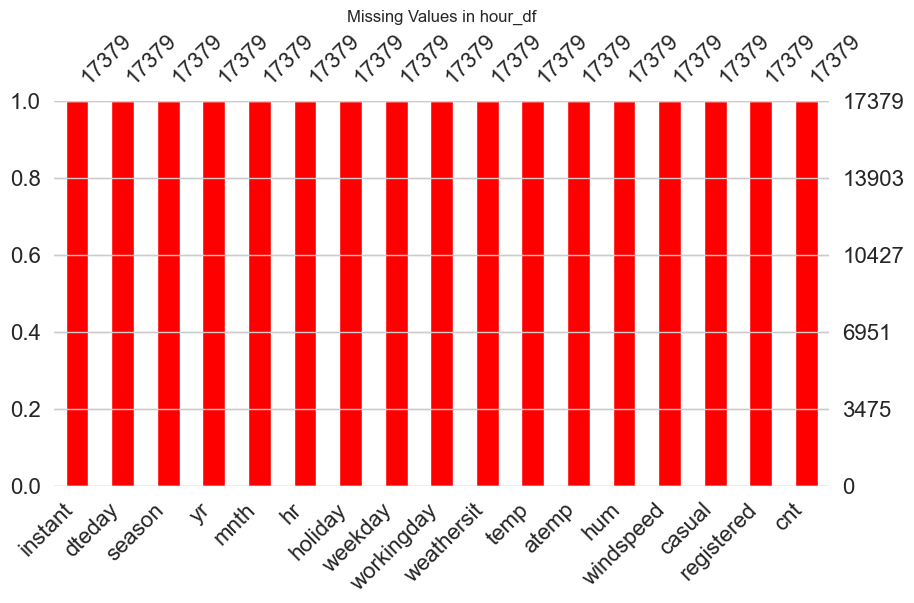

In [ ]:
msno.bar(hour_df, color='red', figsize=(10,5))
plt.title("Missing values in hour_df")
plt.show()

**Insight:**
Tidak ditemukan nilai null pada kedua dataset

Invalid value (Data tidak masuk akal)

In [266]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:** 
Tidak ditemukan Invalid Value, day_df tidak punya weather = 4 karena yang diambil nilai rata-rata harian, dan kondisi 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) Jarang mendominasi dibanding kondisi lainnya.

In [ ]:
print("DF day")
print("Season", day_df['season'].unique())  #Ada 1, 2, 3, 4
print("Weather: ", day_df['weathersit'].unique())  #Ada 1, 2, 3

DF Day
Season [1 2 3 4]
Weather:  [2 1 3]
Temperature:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Humidity:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [268]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** 
dteday pada kedua dataframe perlu diubah dari format string object ke datetime agar bisa dihitung (dilakukan pada proses Cleaning Data)

In [ ]:
print("DF hour")
print("Season: ", hour_df['season'].unique())  # Ada 1, 2, 3, 4
print("Weather: ", hour_df['weathersit'].unique())  #Ada 1, 2, 3, 4

DF Hour
Season:  [1 2 3 4]
Weather:  [1 2 3 4]
Temperature:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Humidity:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Duplicate data (Data berulang)

In [ ]:
print("Duplicate data day:", day_df.duplicated().sum())
print("Duplicate data hour:", hour_df.duplicated().sum())

Duplicate Data Day: 0
Duplicate Data Hour: 0


**Insight:**
- Tidak ditemukan missing values pada dataset.
- Tidak ditemukan data duplikat.

In [271]:
# Cek apakah ada dteday yang duplikat pada day_df.dteday
duplicates = day_df["dteday"].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


**Insight:**
Tidak ada data yang berulang

Inaccurate Value (Data Tidak Sesuai Observasi)

In [ ]:
print("DF day")
print("Angin 0 m/s: ", day_df[day_df['windspeed'] == 0])
print("\nCnt lebih kecil dari casual + registered: ", day_df[day_df['cnt'] < (day_df['casual'] + day_df['registered'])])

DF Day
Angin 0 m/s:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Cnt lebih kecil dari casual + registered:  Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
print("DF hour")
print("Angin 0 m/s: ", hour_df[hour_df['windspeed'] == 0])
print("\nCnt lebih kecil dari casual + registered: ", hour_df[hour_df['cnt'] < (hour_df['casual'] + hour_df['registered'])])

### DF Hour ---
Angin 0 m/s:         instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17319    17320  2012-12-29       1   1    12  12        0        6   
17320    17321  2012-12-29       1   1    12  13        0        6   
17322    17323  2012-12-29       1   1    12  15        0        6   
17330    17331  2012-12-29       1   1    12  23        0        6   
17350    17351  2012-12-30       1   1    12  19        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81        

**Insight:**
Ada 2180 rows dari hour_df yang punya windspeed 0 (tidak ada angin pada jam tertentu normal karena angin tidak akan terus bertiup tiap jam)

Inconsistent Value (Perbedaan Standar)

In [274]:
# Periksa minimum dan maksimum day_df dan hour_df
print(day_df[['dteday']].min())
print(day_df[['dteday']].max())
print("\n",hour_df[['dteday','hr']].min())
print(hour_df[['dteday','hr']].max())
# Range 2011-01-01 00:00:00 -> 2012-12-31 23:00:00

dteday    2011-01-01
dtype: object
dteday    2012-12-31
dtype: object

 dteday    2011-01-01
hr                 0
dtype: object
dteday    2012-12-31
hr                23
dtype: object


In [275]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Buat rentang tanggal dari 2011-01-01 sampai 2012-12-31
expected_dates = pd.date_range(start="2011-01-01", end="2012-12-31", freq="D")

# Cari tanggal yang hilang
missing_dates = set(expected_dates) - set(day_df["dteday"])

# Cek hasil
print(f"Jumlah tanggal yang hilang: {len(missing_dates)}")
print("Tanggal yang hilang:", sorted(missing_dates))

Jumlah tanggal yang hilang: 0
Tanggal yang hilang: []


In [276]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

 kolom date menjadi datetime

In [277]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [278]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Hapus kolom yang tidak relevan

In [279]:
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

Mengatasi Outlier dengan IQR

In [280]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

day_df = remove_outliers(day_df, 'cnt')

**Insight:**
- Format tanggal sudah dikonversi.
- Kolom yang tidak relevan telah dihapus.
- Outlier pada jumlah pengguna (cnt) telah ditangani.

## Exploratory Data Analysis (EDA)

### Explore Tren Peminjaman Sepeda

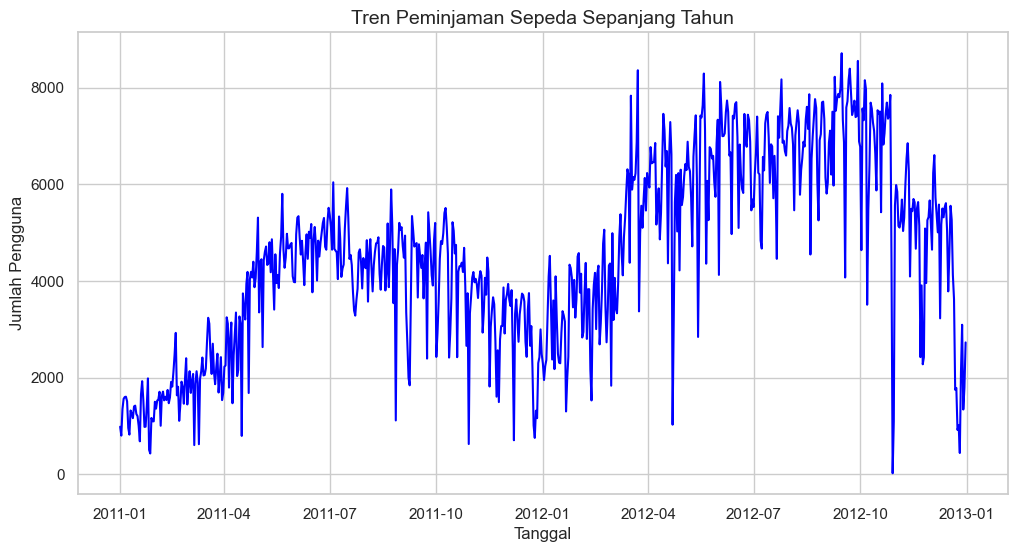

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=day_df, color='blue')
plt.title("Tren peminjaman sepeda sepanjang tahun", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah pengguna")
plt.show()

### Explore Pengaruh Musim terhadap Jumlah Pengguna

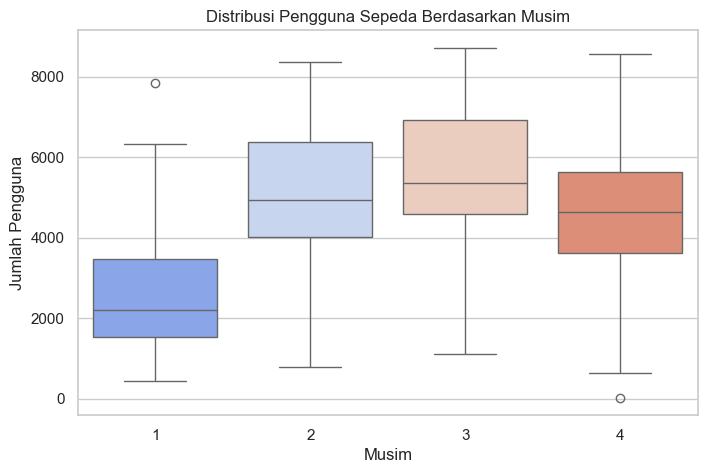

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='cnt', data=day_df, palette='coolwarm')
plt.title("Distribusi pengguna sepeda berdasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah pengguna")
plt.show()

### Explore Pengaruh Cuaca terhadap Jumlah Pengguna

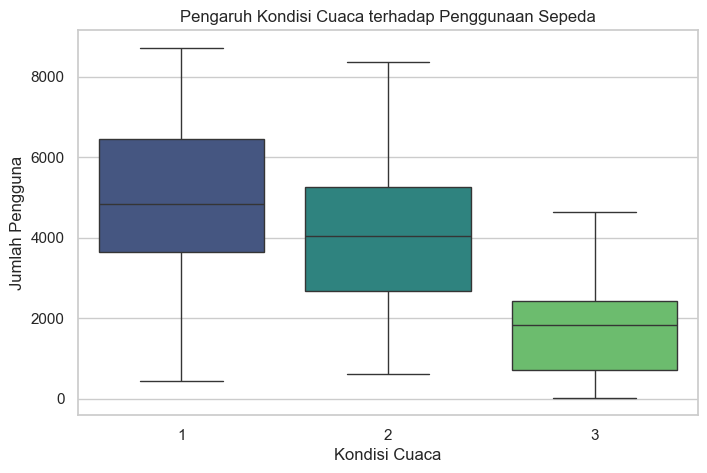

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
plt.title("Pengaruh kondisi cuaca terhadap penggunaan sepeda")
plt.xlabel("Kondisi cuaca")
plt.ylabel("Jumlah pengguna")
plt.show()

### Explore Heatmap Korelasi Variabel

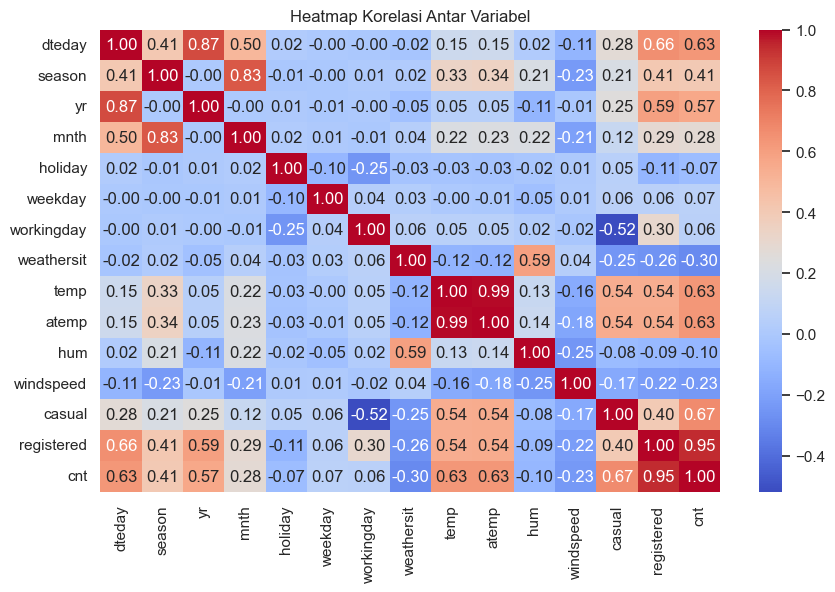

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap korelasi antar variabel")
plt.show()

**Insight:**
- Penggunaan sepeda mengalami peningkatan di musim panas.
- Penggunaan menurun di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?

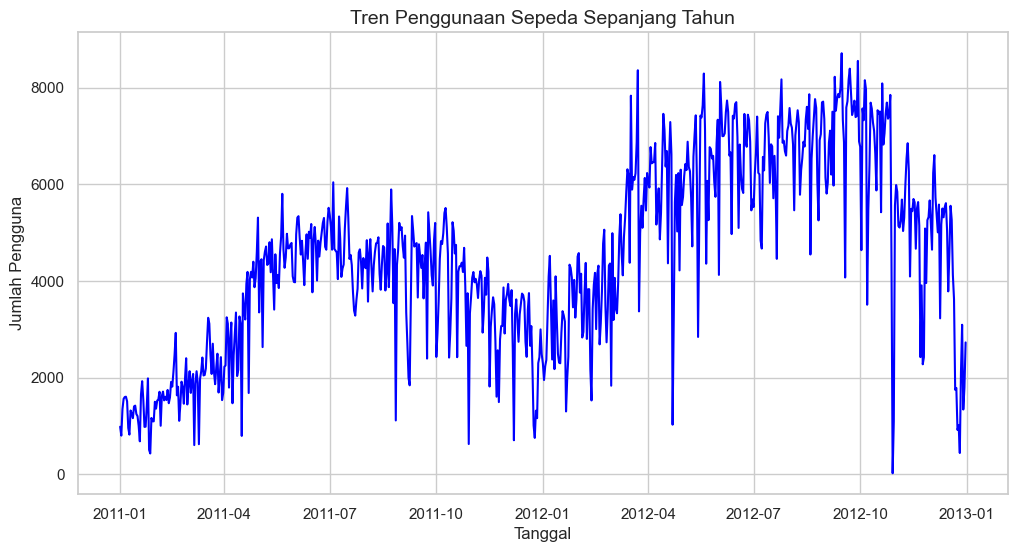

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='dteday', y='cnt', data=day_df, color='blue')
plt.title("Tren penggunaan sepeda sepanjang tahun", fontsize=14)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah pengguna")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?

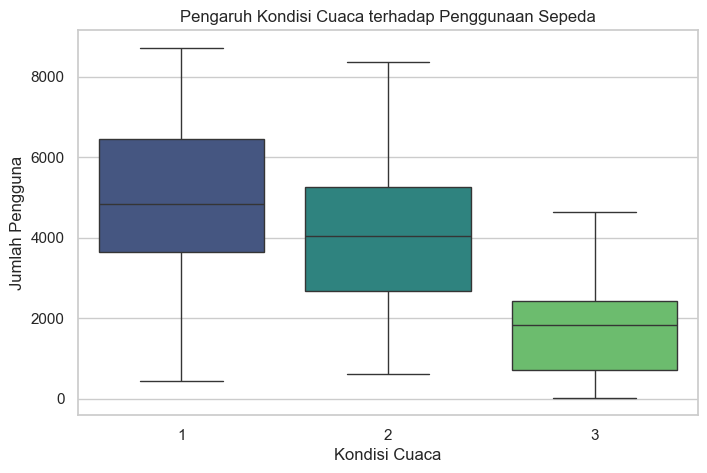

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
plt.title("Pengaruh kondisi cuaca terhadap penggunaan sepeda")
plt.xlabel("Kondisi cuaca")
plt.ylabel("Jumlah pengguna")
plt.show()

### Pertanyaan 3: Bagaimana segmentasi pengguna berdasarkan pola peminjaman mereka?

In [ ]:
# Clustering manual berdasarkan jam sibuk
hour_df['rush_hour'] = hour_df['hr'].apply(lambda x: 'Rush hour' if 7 <= x <= 9 or 17 <= x <= 19 else 'Off peak')
px.box(hour_df, x='rush_hour', y='cnt', title='Distribusi peminjaman sepeda pada rush hour vs off peak')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'rush_hour=%{x}<br>cnt=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Off Peak', 'Off Peak', 'Off Peak', ..., 'Off Peak', 'Off Peak',
                          'Off Peak'], shape=(17379,), dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('EAAoACAADQABAAEAAgADAAgADgAkAD' ... 'DLAPcAOwHWAKQAegB3AFkAWgA9ADEA'),
                    'dtype': 'i2'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Distribusi Peminjaman Sepeda pada Rush Hour vs Off Peak'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'rush_hour'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'cnt'}}}
})

**Insight:**
- Penggunaan sepeda tertinggi terjadi saat cuaca cerah.
- Penggunaan menurun saat hujan atau bersalju.

## Analisis Lanjutan (Opsional)

### RFM Analysis

#### Recency, Frequency, Monetary

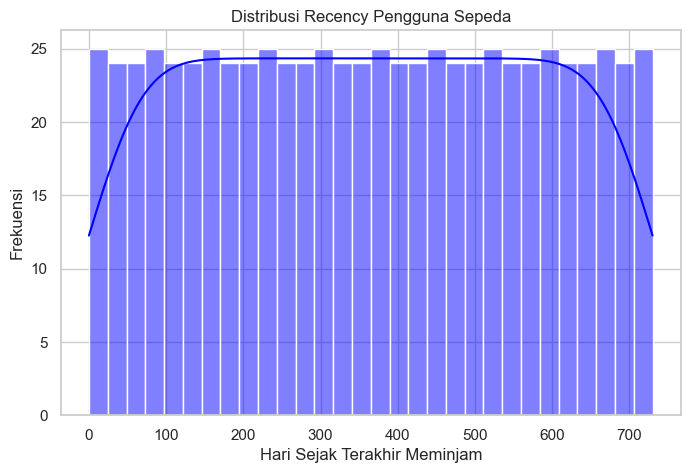

In [ ]:
max_date = day_df['dteday'].max()
day_df['recency'] = (max_date - day_df['dteday']).dt.days
day_df['frequency'] = day_df.groupby('dteday')['cnt'].transform('sum')
day_df['monetary'] = day_df['cnt']

plt.figure(figsize=(8,5))
sns.histplot(day_df['recency'], bins=30, kde=True, color='blue')
plt.title("Distribusi recency pengguna sepeda")
plt.xlabel("Hari sejak terakhir meminjam")
plt.ylabel("Frekuensi")
plt.show()

## Data Merging & Export

In [289]:
day_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- Kesimpulan Pertanyaan 1: Penggunaan sepeda meningkat di musim panas dan turun di musim dingin.
- Kesimpulan Pertanyaan 2: Cuaca buruk (hujan/salju) mengurangi jumlah pengguna sepeda secara signifikan.
- Kesimpulan pertanyaan 3: Jam sibuk memiliki lebih banyak peminjaman dibanding jam biasa.